In [2]:
import pandas as pd
from glob2 import glob
import sys
import pandas as pd
import numpy as np
from glob2 import glob
from azureml.core import Workspace, Dataset

### Sample of the depthmap in a testset

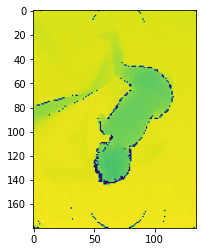

In [99]:
from matplotlib import pyplot as plt
import pickle
paths  = 'depthmap_testset/202/1585364002-gqyabdudft/pc_1585364002-gqyabdudft_1593018669176_202_016.p'
depthmap, targets = pickle.load(open(paths, "rb"))
plt.imshow(np.squeeze(depthmap))

In [100]:
targets

array([90.7, 10.8])

In [4]:
test_files = glob('depthmap_testset/**/*.p')
len(test_files)

57272

### Read the csv files 

In [6]:
import pandas as pd
files = pd.DataFrame(test_files,columns=['paths'])
files.to_csv('testing.csv',index=False)

In [3]:
testdata = pd.read_csv('testing.csv')
testdata.head()

,artifact,qrcode,id,height,weight,key,age
0,pc_1585004725-18cqo1np0j_1592801845251_100_000.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
1,pc_1585004725-18cqo1np0j_1592801845251_100_001.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
2,pc_1585004725-18cqo1np0j_1592801845251_100_002.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
3,pc_1585004725-18cqo1np0j_1592801845251_100_003.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
4,pc_1585004725-18cqo1np0j_1592801845251_100_004.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479


In [4]:
artifacts = pd.read_csv('testing.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 57272


,artifact,qrcode,id,height,weight,key,age
0,pc_1585004725-18cqo1np0j_1592801845251_100_000.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
1,pc_1585004725-18cqo1np0j_1592801845251_100_001.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
2,pc_1585004725-18cqo1np0j_1592801845251_100_002.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
3,pc_1585004725-18cqo1np0j_1592801845251_100_003.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
4,pc_1585004725-18cqo1np0j_1592801845251_100_004.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479


### Number of the children in testset

In [33]:
scans = artifacts.drop_duplicates(subset='qrcode', keep='first').reset_index(drop=True)
print("Total no. of children:",len(scans))
scans.head()

Total no. of children: 1745


,artifact,qrcode,id,height,weight,key,age
0,pc_1585004725-18cqo1np0j_1592801845251_100_000.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479
1,pc_1585012629-ac1ippx2qy_1591848606827_100_000.p,1585012629-ac1ippx2qy,VTv17LBYYqrWXL6L_artifact-scan-pcd_15717024000...,87.3,10.90,101,973
2,pc_1585012645-ii2eyvdpib_1591848619397_100_000.p,1585012645-ii2eyvdpib,Akw83Kik8PTy6xrf_artifact-scan-pcd_15717024000...,103.1,13.95,100,487
3,pc_1585012682-ccfj5uwkr6_1591848647875_100_000.p,1585012682-ccfj5uwkr6,U55iJZJv0eWbuRl7_artifact-scan-pcd_15717024000...,90.9,11.15,100,1344
4,pc_1585012756-r5jc2vztha_1591848681729_100_000.p,1585012756-r5jc2vztha,Yn4u5mO2tsf9EUMA_artifact-scan-pcd_15717024000...,84.6,10.25,101,1145


### Converting the age from days to years

In [34]:
## function to convert the days into age
def age(row):
    in_years= row['age']/365
    return round(in_years)

In [101]:
scans['Years'] = scans.apply(age,axis=1)
scans.head()

,artifact,qrcode,id,height,weight,key,age,Years
0,pc_1585004725-18cqo1np0j_1592801845251_100_000.p,1585004725-18cqo1np0j,8KBPkWCDQoxSItFJ_artifact-scan-pcd_15679872000...,96.8,13.65,100,1479,4
1,pc_1585012629-ac1ippx2qy_1591848606827_100_000.p,1585012629-ac1ippx2qy,VTv17LBYYqrWXL6L_artifact-scan-pcd_15717024000...,87.3,10.90,101,973,3
2,pc_1585012645-ii2eyvdpib_1591848619397_100_000.p,1585012645-ii2eyvdpib,Akw83Kik8PTy6xrf_artifact-scan-pcd_15717024000...,103.1,13.95,100,487,1
3,pc_1585012682-ccfj5uwkr6_1591848647875_100_000.p,1585012682-ccfj5uwkr6,U55iJZJv0eWbuRl7_artifact-scan-pcd_15717024000...,90.9,11.15,100,1344,4
4,pc_1585012756-r5jc2vztha_1591848681729_100_000.p,1585012756-r5jc2vztha,Yn4u5mO2tsf9EUMA_artifact-scan-pcd_15717024000...,84.6,10.25,101,1145,3


4     513
3     475
5     349
2     318
1      78
0       8
6       3
50      1
Name: Years, dtype: int64


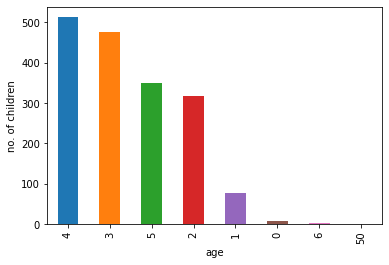

In [36]:
age_ax = scans['Years'].value_counts().plot(kind='bar')
age_ax.set_xlabel('age')
age_ax.set_ylabel('no. of children')
print(scans['Years'].value_counts())

101    29281
102    14088
100    13778
200       67
201       41
202       17
Name: key, dtype: int64


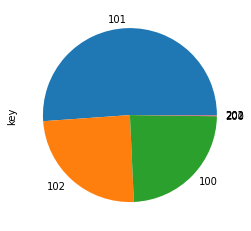

In [11]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
artifacts['key'].value_counts().plot(kind='pie')

### Distribution data based on height, weight and age

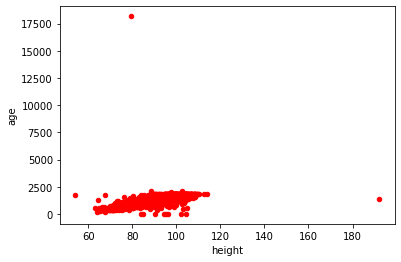

In [38]:
#distribution of height against age
heightvsage = scans.plot.scatter(x='height',
                      y='age',
                      c='red')

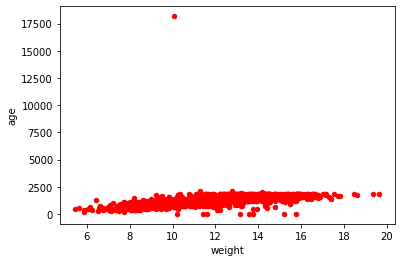

In [109]:
#distribution of weight against age
weightvsage = scans.plot.scatter(x='weight',
                      y='age',
                      c='red')

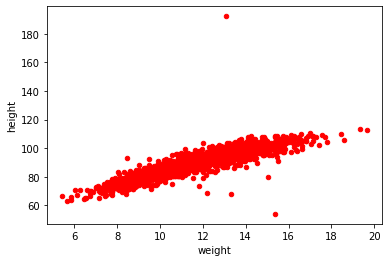

In [110]:
#distribution of weight against height
weightvsheight = scans.plot.scatter(x='weight',
                      y='height',
                      c='red')